# Elhub API data - Gridloss - Summerproject 2025

## Missing values

Bjørn Eirik Rognskog Nordbak

### Importing data from Elhub API
https://api.elhub.no/energy-data-api#/grid-areas

In [16]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo

oslo = ZoneInfo("Europe/Oslo")

def fetch_window(start_dt, end_dt):
    params = {
        "dataset":   "LOSS_PER_MGA_HOUR",
        "startDate": start_dt.isoformat(),
        "endDate":   end_dt.isoformat(),
    }
    url = "https://api.elhub.no/energy-data/v0/grid-areas"
    resp = requests.get(url, params=params)
    obj = resp.json()
    
    # --- safeguard: if there's no "data", bail with empty DF ----
    raw = obj.get("data")
    if raw is None:
        print(f"  → no 'data' for {start_dt.date()} → {end_dt.date()}, skipping")
        return pd.DataFrame()
    
    # otherwise flatten
    df = pd.json_normalize(
        raw,
        record_path=["attributes", "lossPerMgaHour"],
        meta=[
            ["attributes", "eic"],
            ["attributes", "name"],
            ["attributes", "status"],
        ],
        errors="ignore"
    ).rename(columns={
        "attributes.eic":    "eic",
        "attributes.name":   "name",
        "attributes.status": "status",
    })
    return df

# loop as before
span_start = datetime(2023,1,1,0,0, tzinfo=oslo)
span_end   = datetime(2025,6,1,0,0, tzinfo=oslo)
window = timedelta(days=7)

all_chunks = []
cur = span_start
while cur < span_end:
    nxt = min(cur + window, span_end)
    print(f"Fetching {cur.date()} → {nxt.date()}")
    dfc = fetch_window(cur, nxt)
    all_chunks.append(dfc)
    cur = nxt

big_df = pd.concat(all_chunks, ignore_index=True)


Fetching 2023-01-01 → 2023-01-08
Fetching 2023-01-08 → 2023-01-15
Fetching 2023-01-15 → 2023-01-22
Fetching 2023-01-22 → 2023-01-29
Fetching 2023-01-29 → 2023-02-05
Fetching 2023-02-05 → 2023-02-12
Fetching 2023-02-12 → 2023-02-19
Fetching 2023-02-19 → 2023-02-26
Fetching 2023-02-26 → 2023-03-05
Fetching 2023-03-05 → 2023-03-12
Fetching 2023-03-12 → 2023-03-19
Fetching 2023-03-19 → 2023-03-26
Fetching 2023-03-26 → 2023-04-02
Fetching 2023-04-02 → 2023-04-09
Fetching 2023-04-09 → 2023-04-16
Fetching 2023-04-16 → 2023-04-23
Fetching 2023-04-23 → 2023-04-30
Fetching 2023-04-30 → 2023-05-07
Fetching 2023-05-07 → 2023-05-14
Fetching 2023-05-14 → 2023-05-21
Fetching 2023-05-21 → 2023-05-28
Fetching 2023-05-28 → 2023-06-04
Fetching 2023-06-04 → 2023-06-11
Fetching 2023-06-11 → 2023-06-18
Fetching 2023-06-18 → 2023-06-25
Fetching 2023-06-25 → 2023-07-02
Fetching 2023-07-02 → 2023-07-09
Fetching 2023-07-09 → 2023-07-16
Fetching 2023-07-16 → 2023-07-23
Fetching 2023-07-23 → 2023-07-30
Fetching 2

### Reading data from premade CSV file

In [29]:
import pandas as pd

big_df = pd.read_csv('big_df.csv')

big_df.head()

,calculatedLossFraction,calculatedLossQuantityKwh,endTime,gridArea,lastUpdatedTime,netInfeedQuantityKwh,priceArea,startTime,eic,name,status
0,0.062064,1451.970,2023-01-01T01:00:00+01:00,KRAGERØ1,2025-03-28T22:03:12+01:00,23394.820,NO2,2023-01-01T00:00:00+01:00,50Y-7FS806KF24QR,KRAGERØ1,Active
1,0.059934,1399.627,2023-01-01T02:00:00+01:00,KRAGERØ1,2025-03-28T22:03:12+01:00,23352.914,NO2,2023-01-01T01:00:00+01:00,50Y-7FS806KF24QR,KRAGERØ1,Active
2,0.061977,1430.195,2023-01-01T03:00:00+01:00,KRAGERØ1,2025-03-28T22:03:12+01:00,23076.060,NO2,2023-01-01T02:00:00+01:00,50Y-7FS806KF24QR,KRAGERØ1,Active
3,0.060450,1373.440,2023-01-01T04:00:00+01:00,KRAGERØ1,2025-03-28T22:03:12+01:00,22720.318,NO2,2023-01-01T03:00:00+01:00,50Y-7FS806KF24QR,KRAGERØ1,Active
4,0.060322,1360.366,2023-01-01T05:00:00+01:00,KRAGERØ1,2025-03-28T22:03:12+01:00,22551.768,NO2,2023-01-01T04:00:00+01:00,50Y-7FS806KF24QR,KRAGERØ1,Active


In [24]:
# 1. Summary with .info()
#    This shows you how many non-null rows each column has.
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917787 entries, 0 to 2917786
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   calculatedLossFraction     float64
 1   calculatedLossQuantityKwh  float64
 2   endTime                    object 
 3   gridArea                   object 
 4   lastUpdatedTime            object 
 5   netInfeedQuantityKwh       float64
 6   priceArea                  object 
 7   startTime                  object 
 8   eic                        object 
 9   name                       object 
 10  status                     object 
dtypes: float64(3), object(8)
memory usage: 244.9+ MB


In [25]:
# 2. Count of missing per column
missing_counts = big_df.isnull().sum()
print(missing_counts)

calculatedLossFraction       0
calculatedLossQuantityKwh    0
endTime                      0
gridArea                     0
lastUpdatedTime              0
netInfeedQuantityKwh         0
priceArea                    0
startTime                    0
eic                          0
name                         0
status                       0
dtype: int64


### Check for temporal gaps

In [30]:
import pandas as pd

# 1) Parse your timestamps & sort
df = big_df.copy()
df['startTime'] = pd.to_datetime(df['startTime'], utc=True)
df = df.sort_values(['eic', 'startTime'])

# 2) Compute the difference between each timestamp and the previous one
df['delta'] = df.groupby('eic')['startTime'].diff()

# 3) Find all cases where that delta isn’t exactly 1 hour
gaps = df[(df['delta'].notna()) & (df['delta'] != pd.Timedelta(hours=1))].copy()

# 4) For clarity, pull in the “previous timestamp” and the size of the gap
gaps['prevTime']  = gaps.groupby('eic')['startTime'].shift(1)
gaps['gapHours'] = gaps['delta'].dt.total_seconds() / 3600

# 5) Show the gaps
gaps[['eic', 'prevTime', 'startTime', 'gapHours']].reset_index(drop=True)


,eic,prevTime,startTime,gapHours
0,50Y-7FS806KF24QR,NaT,2023-11-04 23:00:00+00:00,170.0
1,50Y-7FS806KF24QR,2023-11-04 23:00:00+00:00,2024-11-02 23:00:00+00:00,170.0
2,50Y-AABJ1ZGH7DNR,NaT,2023-11-04 23:00:00+00:00,170.0
3,50Y-AABJ1ZGH7DNR,2023-11-04 23:00:00+00:00,2024-11-02 23:00:00+00:00,170.0
4,50Y-DNIYJ0PY0-73,NaT,2023-11-04 23:00:00+00:00,170.0
...,...,...,...,...
275,50YYCCAVRRQUHNTV,2023-11-04 23:00:00+00:00,2024-11-02 23:00:00+00:00,170.0
276,50YYEW-9BU3UI3GF,NaT,2023-11-04 23:00:00+00:00,170.0
277,50YYEW-9BU3UI3GF,2023-11-04 23:00:00+00:00,2024-11-02 23:00:00+00:00,170.0
278,50YZSOZBH-PXFAUA,NaT,2023-11-04 23:00:00+00:00,170.0


In [31]:
import pandas as pd

# 1) Parse your timestamps & sort
df = big_df.copy()
df['startTime'] = pd.to_datetime(df['startTime'], utc=True)
df = df.sort_values(['name', 'startTime'])

# 2) Compute the difference between each timestamp and the previous one, per name
df['delta_name'] = df.groupby('name')['startTime'].diff()

# 3) Find all cases where that delta isn’t exactly 1 hour
gaps_name = df[(df['delta_name'].notna()) & (df['delta_name'] != pd.Timedelta(hours=1))].copy()

# 4) For clarity, pull in the “previous timestamp” and the size of the gap
gaps_name['prevTime']  = gaps_name.groupby('name')['startTime'].shift(1)
gaps_name['gapHours'] = gaps_name['delta_name'].dt.total_seconds() / 3600

# 5) Show the gaps
gaps_name[['name', 'prevTime', 'startTime', 'gapHours']].reset_index(drop=True)


,name,prevTime,startTime,gapHours
0,AEN1 RN,NaT,2023-11-04 23:00:00+00:00,170.0
1,AEN1 RN,2023-11-04 23:00:00+00:00,2024-11-02 23:00:00+00:00,170.0
2,AEN2 DN,NaT,2023-11-04 23:00:00+00:00,170.0
3,AEN2 DN,2023-11-04 23:00:00+00:00,2024-11-02 23:00:00+00:00,170.0
4,AEN3 DN,NaT,2023-11-04 23:00:00+00:00,170.0
...,...,...,...,...
275,YMBER4,2023-11-04 23:00:00+00:00,2024-11-02 23:00:00+00:00,170.0
276,ÅRDAL1,NaT,2023-11-04 23:00:00+00:00,170.0
277,ÅRDAL1,2023-11-04 23:00:00+00:00,2024-11-02 23:00:00+00:00,170.0
278,ØEIKER1,NaT,2023-11-04 23:00:00+00:00,170.0


In [26]:
# 1. Basic descriptive stats for all numeric columns
stats = big_df.describe()
print(stats)

       calculatedLossFraction  calculatedLossQuantityKwh  netInfeedQuantityKwh
count            2.917787e+06               2.917787e+06          2.917787e+06
mean            -4.739101e-02               3.095494e+03          7.862576e+04
std              1.753155e+02               4.424056e+04          2.436329e+05
min             -2.981420e+05              -9.773975e+05         -8.526975e+05
25%              4.102619e-02               3.130845e+02          3.719704e+03
50%              5.602364e-02               1.050739e+03          1.726420e+04
75%              9.123677e-02               3.161812e+03          5.110310e+04
max              1.000000e+00               1.039532e+06          4.816030e+06


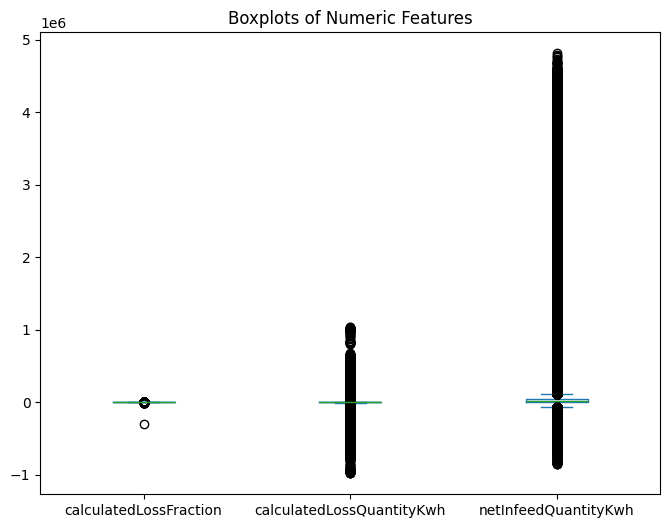

In [27]:
import matplotlib.pyplot as plt

# Boxplots to spot outliers
big_df.select_dtypes('number').plot.box(figsize=(8, 6))
plt.title('Boxplots of Numeric Features')
plt.show()

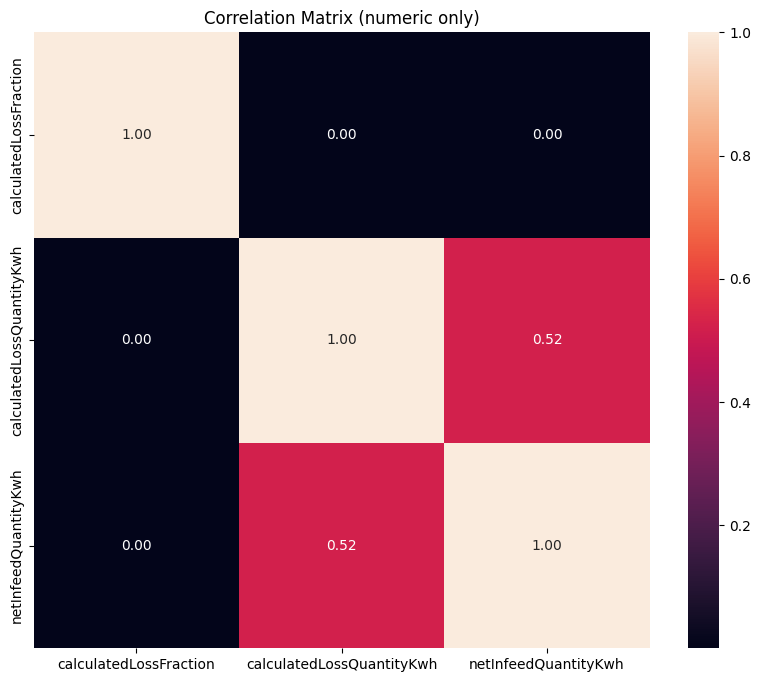

In [28]:
# Option A: pandas ≥1.5 has numeric_only parameter
corr = big_df.corr(numeric_only=True)

# Option B: select numeric dtypes yourself
import numpy as np
num_df = big_df.select_dtypes(include=[np.number])
corr = num_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns  # optional, but nicer

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix (numeric only)')
plt.show()
